In [27]:
import importlib
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

eda_dpp_utils = importlib.import_module('eda_dpp_utils')
feature_eng_utils = importlib.import_module('feature_eng_utils')
model_utils = importlib.import_module('model_utils')

importlib.reload(eda_dpp_utils)
importlib.reload(feature_eng_utils)
importlib.reload(model_utils)


<module 'model_utils' from '/Users/shardulankurnewasker/Desktop/actlcompsci/y2/t3/comp9417/forecasting_air_pollution/model_utils.py'>

In [2]:
df, df_unnormalised, num_cols, df_unclean = eda_dpp_utils.preProcessing()
df = model_utils.featurePrep(df_unnormalised)
print(df)
total_nans = df.isna().sum().sum()
print("Total NaNs in the dataframe:", total_nans)
# Check for inf
print("Columns with inf values:")
print(df.columns[(np.isinf(df).any())])
# Check for extremely large values
print("Columns with very large values (>1e10):")
print(df.columns[(df.abs() > 1e10).any()])

                     CO(GT)  PT08.S1(CO)    NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
timestamp                                                                       
2004-03-10 19:00:00     2.0       1292.0  112.000000       9.4       912025.0   
2004-03-10 20:00:00     2.2       1402.0   88.000000       9.0       881721.0   
2004-03-10 21:00:00     2.2       1376.0   80.000000       9.2       898704.0   
2004-03-10 22:00:00     1.6       1272.0   51.000000       6.5       698896.0   
2004-03-10 23:00:00     1.2       1197.0   38.000000       4.7       562500.0   
...                     ...          ...         ...       ...            ...   
2005-04-04 10:00:00     3.1       1314.0  218.811816      13.5      1212201.0   
2005-04-04 11:00:00     2.4       1163.0  218.811816      11.4      1054729.0   
2005-04-04 12:00:00     2.4       1142.0  218.811816      12.4      1129969.0   
2005-04-04 13:00:00     2.1       1003.0  218.811816       9.5       923521.0   
2005-04-04 14:00:00     2.2 


=== LASSO regression for CO(GT) t+1 ===
Best alpha selected by CV: 3.79269e-03

Selected (non-zero) coefficients:
              feature  coefficient
11      C6H6(GT)_lag1    -0.769121
2       PT08.S2(NMHC)     0.701113
9         CO(GT)_lag1     0.482059
0         PT08.S1(CO)     0.244425
12       NOx(GT)_lag1     0.232423
16     hour_bin_12-17     0.200444
15      hour_bin_6-11     0.137882
17     hour_bin_18-23     0.102072
1            NMHC(GT)     0.096271
4        PT08.S4(NO2)     0.094799
14          is_sunday    -0.081482
10      NMHC(GT)_lag1    -0.080993
8                  AH    -0.071129
3        PT08.S3(NOx)     0.058053
7                  RH     0.019986
6                   T    -0.019064
20  month_bin_Oct-Dec     0.016509
18  month_bin_Apr-Jun     0.002136
13       NO2(GT)_lag1    -0.000545
5         PT08.S5(O3)     0.000124
CO(GT) t+1 RMSE: 0.8360


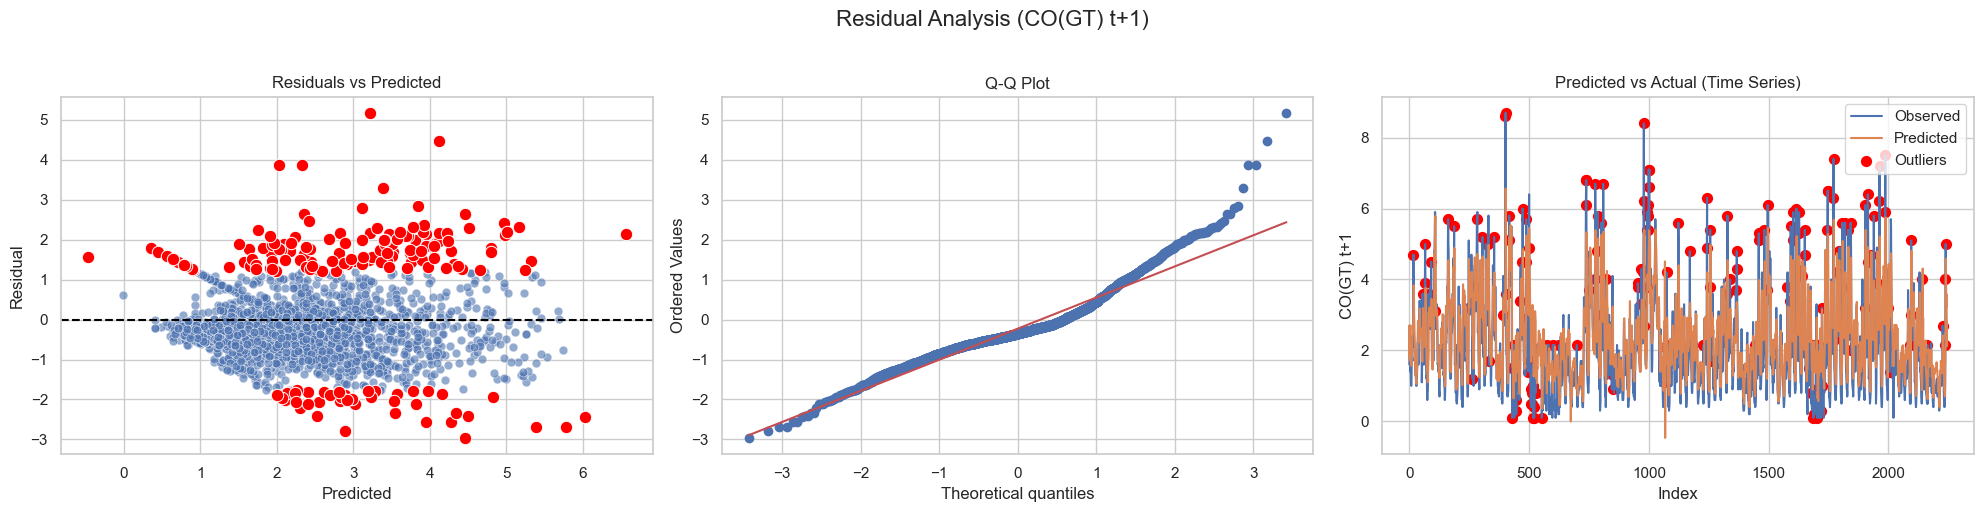


=== LASSO regression for CO(GT) t+6 ===
Best alpha selected by CV: 1.27427e-02

Selected (non-zero) coefficients:
               feature  coefficient
17      hour_bin_18-23    -0.399569
5          PT08.S5(O3)     0.334671
12        NOx(GT)_lag1     0.300399
14           is_sunday    -0.214864
16      hour_bin_12-17     0.202505
2        PT08.S2(NMHC)    -0.146309
19  month_bin_July-Sep    -0.115266
11       C6H6(GT)_lag1    -0.088987
9          CO(GT)_lag1    -0.057092
7                   RH     0.047977
15       hour_bin_6-11    -0.020107
18   month_bin_Apr-Jun    -0.013572
10       NMHC(GT)_lag1    -0.003943
CO(GT) t+6 RMSE: 1.2678


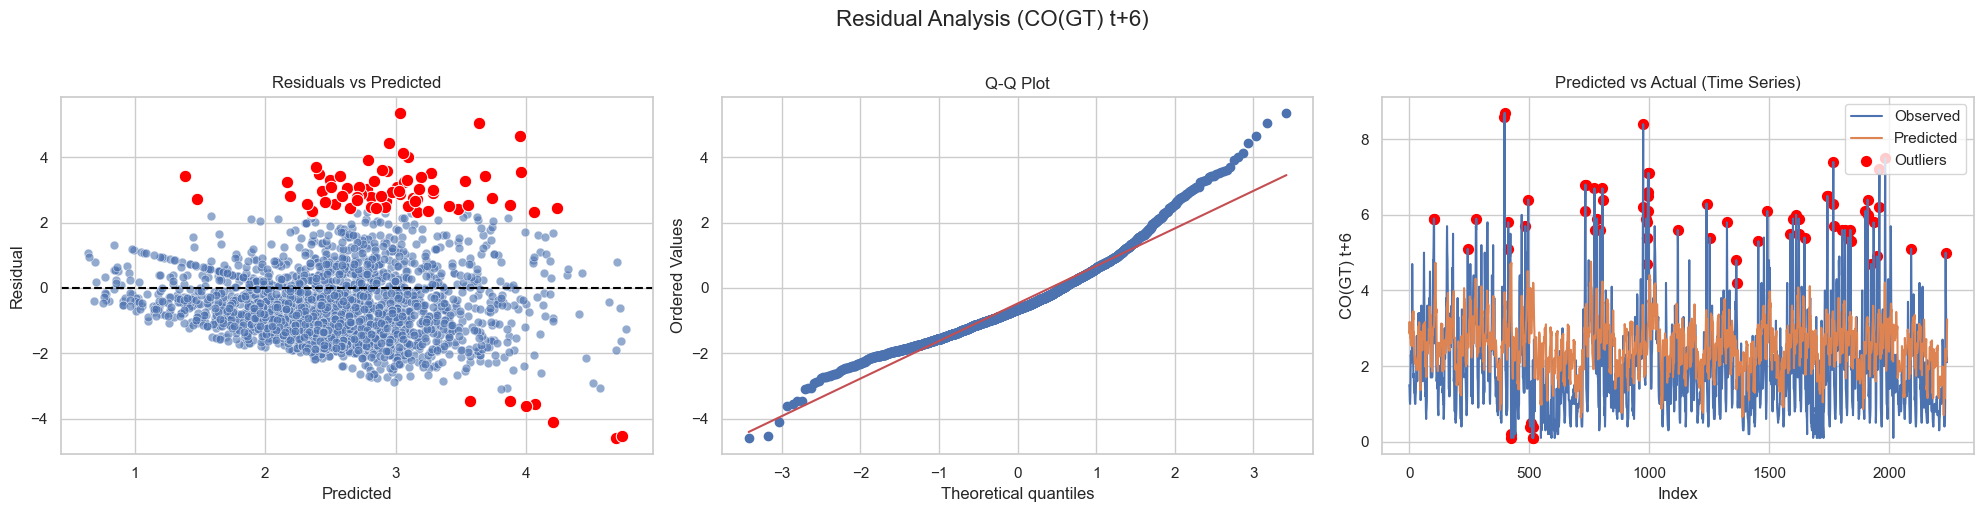


=== LASSO regression for CO(GT) t+12 ===
Best alpha selected by CV: 6.95193e-03

Selected (non-zero) coefficients:
              feature  coefficient
5         PT08.S5(O3)     0.353101
7                  RH     0.329754
16     hour_bin_12-17    -0.263191
8                  AH    -0.198691
11      C6H6(GT)_lag1    -0.185449
15      hour_bin_6-11     0.158166
14          is_sunday    -0.146736
20  month_bin_Oct-Dec     0.109659
6                   T     0.106929
9         CO(GT)_lag1     0.080821
2       PT08.S2(NMHC)    -0.074413
3        PT08.S3(NOx)    -0.035588
13       NO2(GT)_lag1    -0.034692
12       NOx(GT)_lag1    -0.020362
17     hour_bin_18-23     0.012769
18  month_bin_Apr-Jun    -0.004144
CO(GT) t+12 RMSE: 1.2048


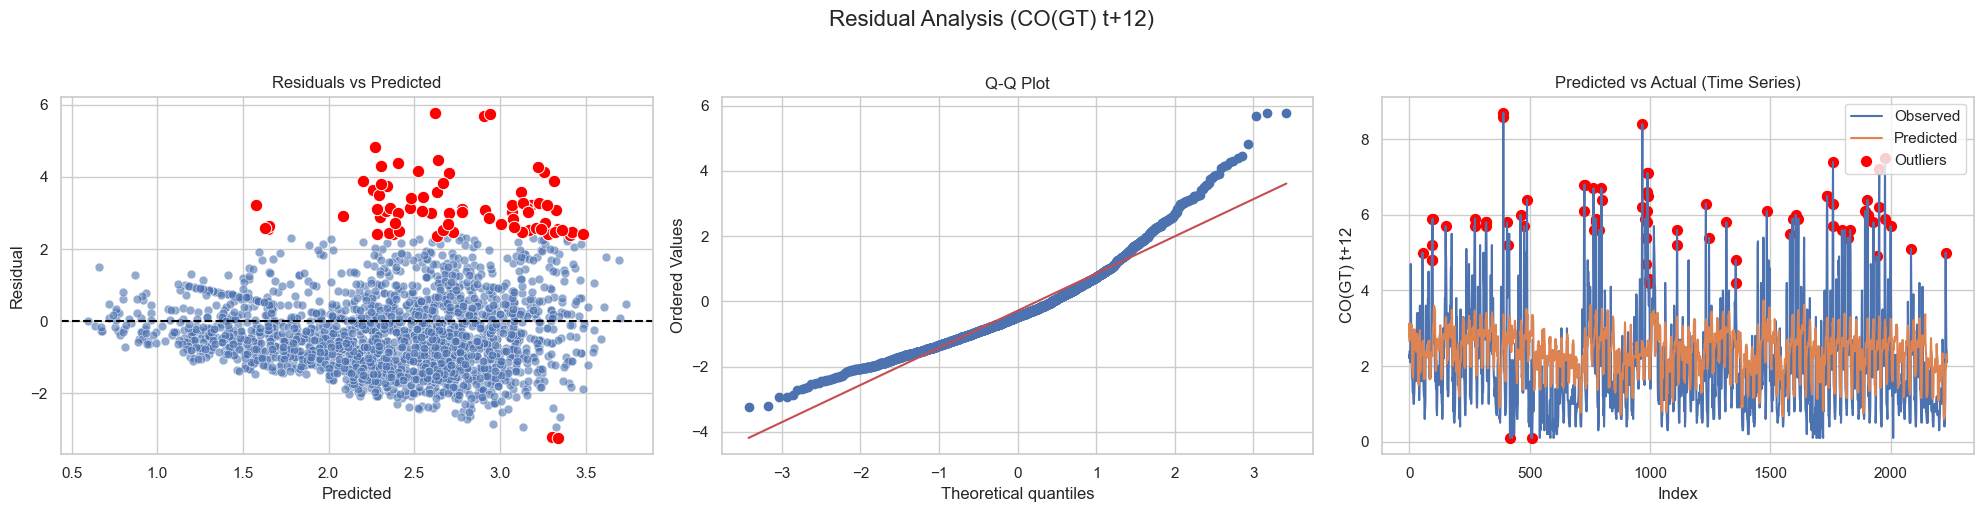


=== LASSO regression for CO(GT) t+24 ===
Best alpha selected by CV: 1.27427e-02

Selected (non-zero) coefficients:
               feature  coefficient
2        PT08.S2(NMHC)     0.377894
17      hour_bin_18-23     0.202730
12        NOx(GT)_lag1     0.202064
6                    T    -0.189203
7                   RH    -0.122555
16      hour_bin_12-17     0.113485
0          PT08.S1(CO)     0.092766
13        NO2(GT)_lag1     0.088540
15       hour_bin_6-11     0.085486
14           is_sunday     0.084202
9          CO(GT)_lag1     0.042073
20   month_bin_Oct-Dec     0.035933
1             NMHC(GT)     0.017193
19  month_bin_July-Sep    -0.012772
18   month_bin_Apr-Jun    -0.002831
CO(GT) t+24 RMSE: 1.2119


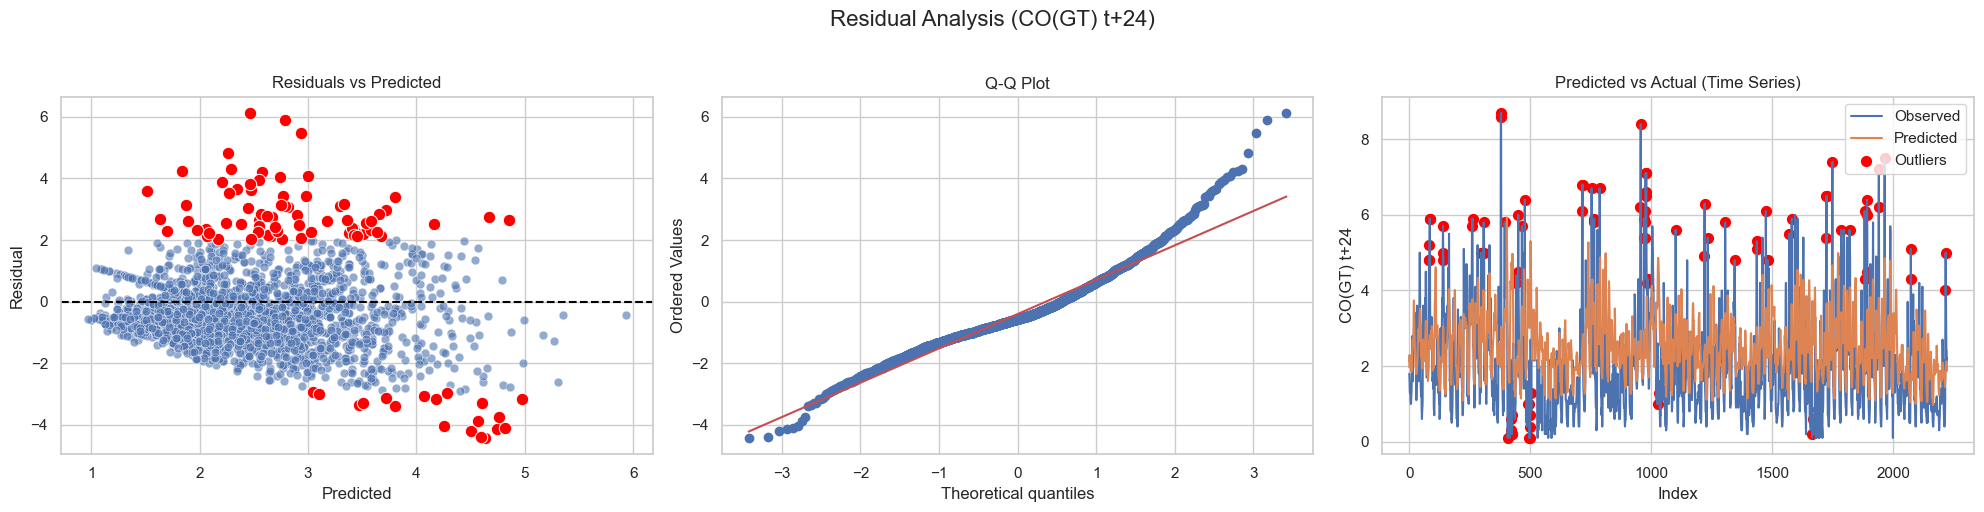


=== LASSO regression for C6H6(GT) t+1 ===
Best alpha selected by CV: 7.84760e-02

Selected (non-zero) coefficients:
               feature  coefficient
2        PT08.S2(NMHC)     6.019388
11       C6H6(GT)_lag1    -1.744417
16      hour_bin_12-17     1.104056
15       hour_bin_6-11     1.018732
5          PT08.S5(O3)     0.533369
0          PT08.S1(CO)     0.527890
14           is_sunday    -0.444752
3         PT08.S3(NOx)     0.295999
17      hour_bin_18-23     0.290696
1             NMHC(GT)    -0.070163
10       NMHC(GT)_lag1    -0.026274
20   month_bin_Oct-Dec     0.012876
12        NOx(GT)_lag1     0.012101
19  month_bin_July-Sep    -0.005612
18   month_bin_Apr-Jun     0.003510
C6H6(GT) t+1 RMSE: 3.3702


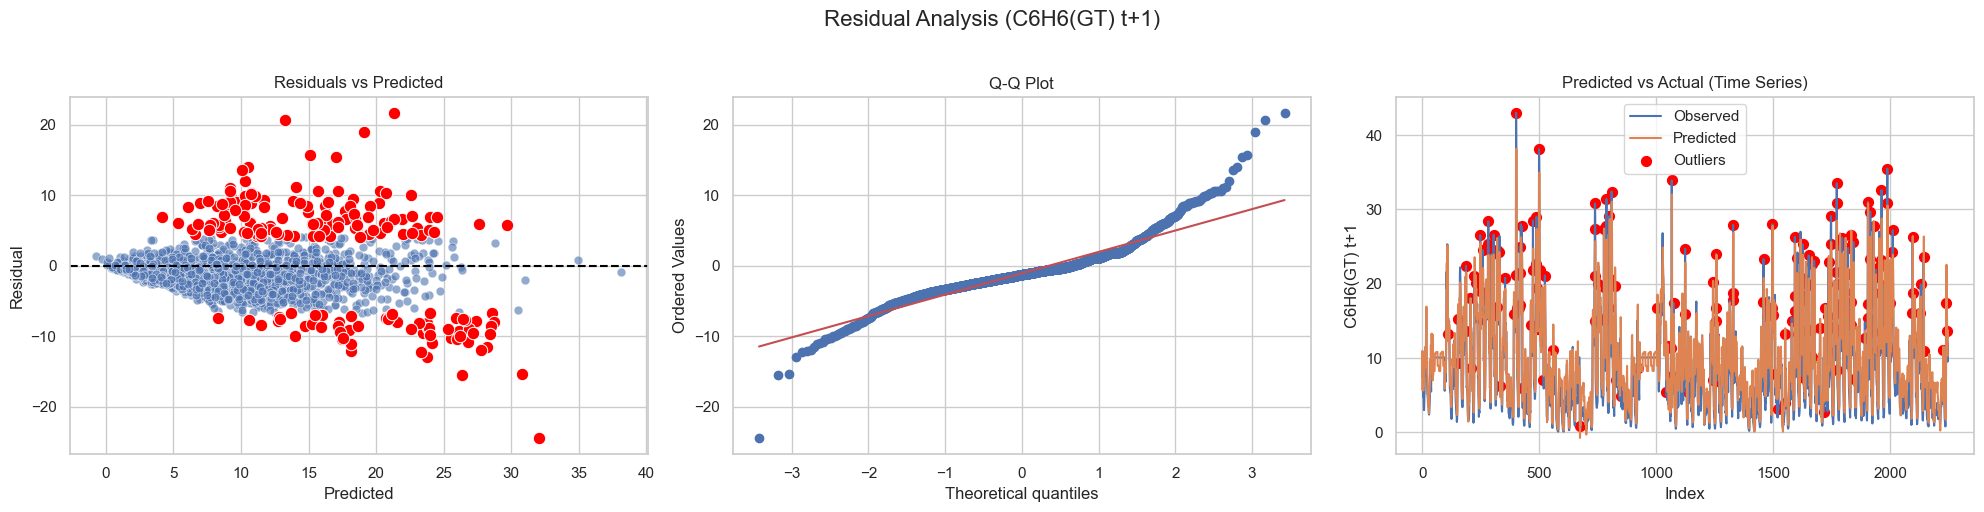


=== LASSO regression for C6H6(GT) t+6 ===
Best alpha selected by CV: 1.43845e-01

Selected (non-zero) coefficients:
               feature  coefficient
17      hour_bin_18-23    -3.598331
5          PT08.S5(O3)     1.554856
14           is_sunday    -1.415714
15       hour_bin_6-11    -0.574047
12        NOx(GT)_lag1     0.560264
6                    T     0.424454
19  month_bin_July-Sep    -0.409293
9          CO(GT)_lag1    -0.358935
20   month_bin_Oct-Dec     0.163012
8                   AH     0.113539
C6H6(GT) t+6 RMSE: 5.6821


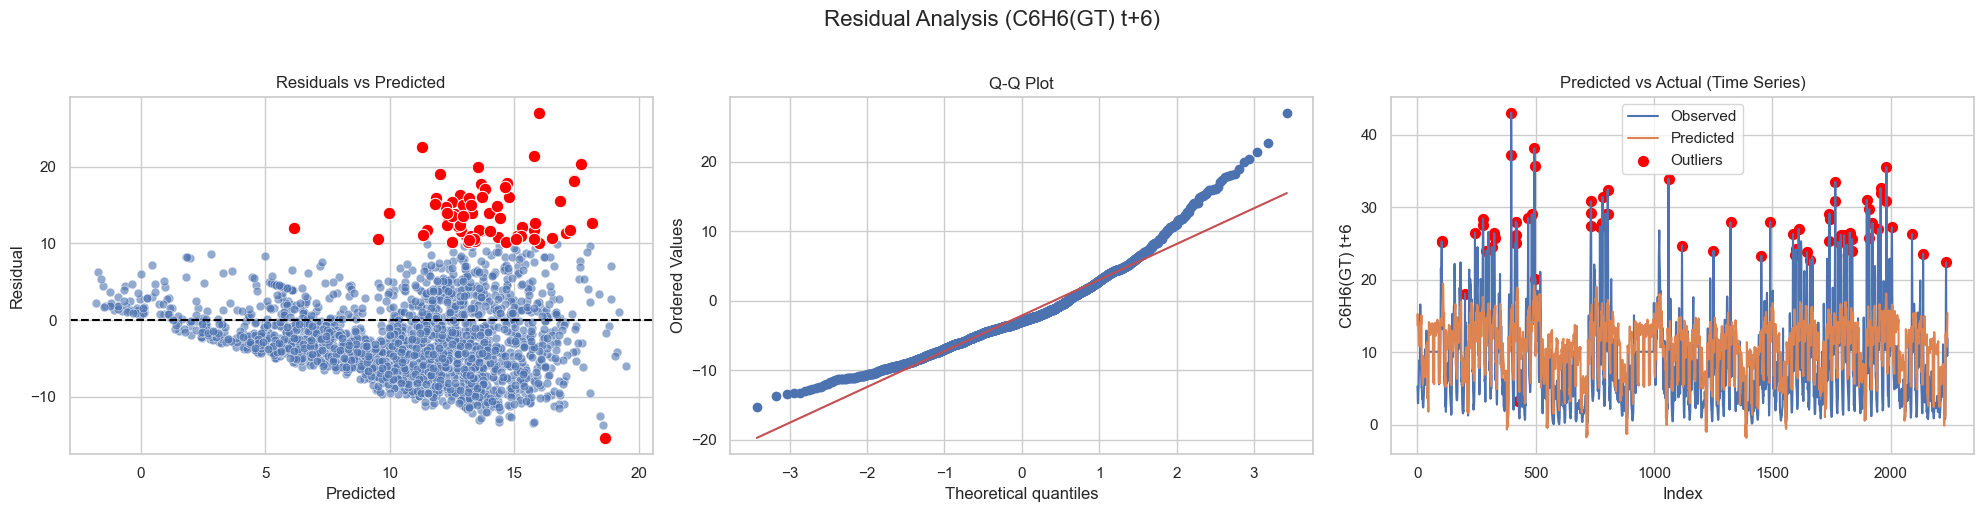


=== LASSO regression for C6H6(GT) t+12 ===
Best alpha selected by CV: 2.06914e-03

Selected (non-zero) coefficients:
               feature  coefficient
5          PT08.S5(O3)     3.797711
7                   RH     3.553441
6                    T     2.818543
0          PT08.S1(CO)    -2.496876
16      hour_bin_12-17    -2.248170
8                   AH    -1.752285
12        NOx(GT)_lag1    -0.938508
14           is_sunday    -0.792347
19  month_bin_July-Sep    -0.556723
2        PT08.S2(NMHC)     0.521851
15       hour_bin_6-11     0.504021
17      hour_bin_18-23     0.489782
9          CO(GT)_lag1    -0.289942
18   month_bin_Apr-Jun    -0.243558
4         PT08.S4(NO2)    -0.212448
11       C6H6(GT)_lag1    -0.129546
20   month_bin_Oct-Dec    -0.068982
3         PT08.S3(NOx)    -0.061868
1             NMHC(GT)     0.040925
10       NMHC(GT)_lag1    -0.029064
13        NO2(GT)_lag1    -0.021209
C6H6(GT) t+12 RMSE: 5.9341


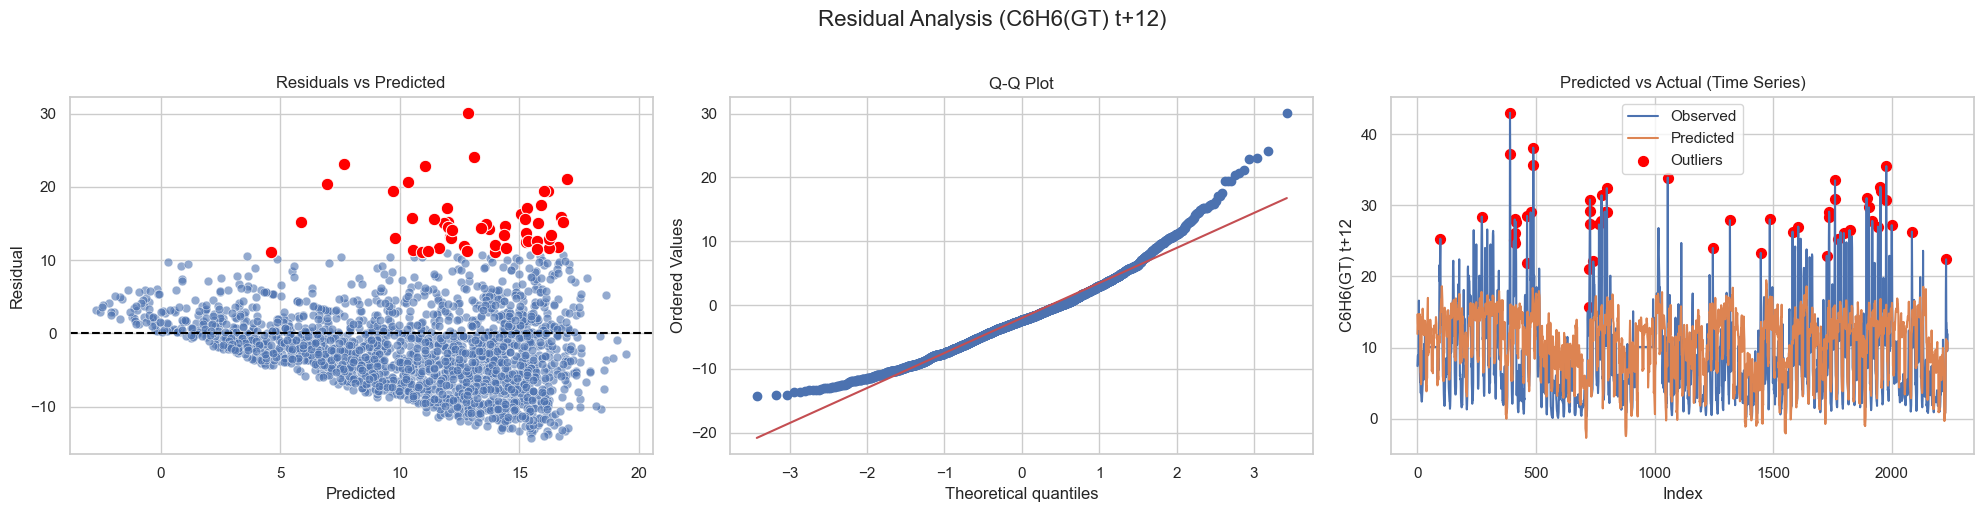


=== LASSO regression for C6H6(GT) t+24 ===
Best alpha selected by CV: 1.43845e-01

Selected (non-zero) coefficients:
               feature  coefficient
2        PT08.S2(NMHC)     3.978039
17      hour_bin_18-23     0.966800
15       hour_bin_6-11     0.882635
14           is_sunday     0.782867
16      hour_bin_12-17     0.588668
7                   RH    -0.474608
20   month_bin_Oct-Dec     0.328123
11       C6H6(GT)_lag1     0.314154
8                   AH    -0.077359
19  month_bin_July-Sep    -0.052869
13        NO2(GT)_lag1     0.012333
C6H6(GT) t+24 RMSE: 5.0829


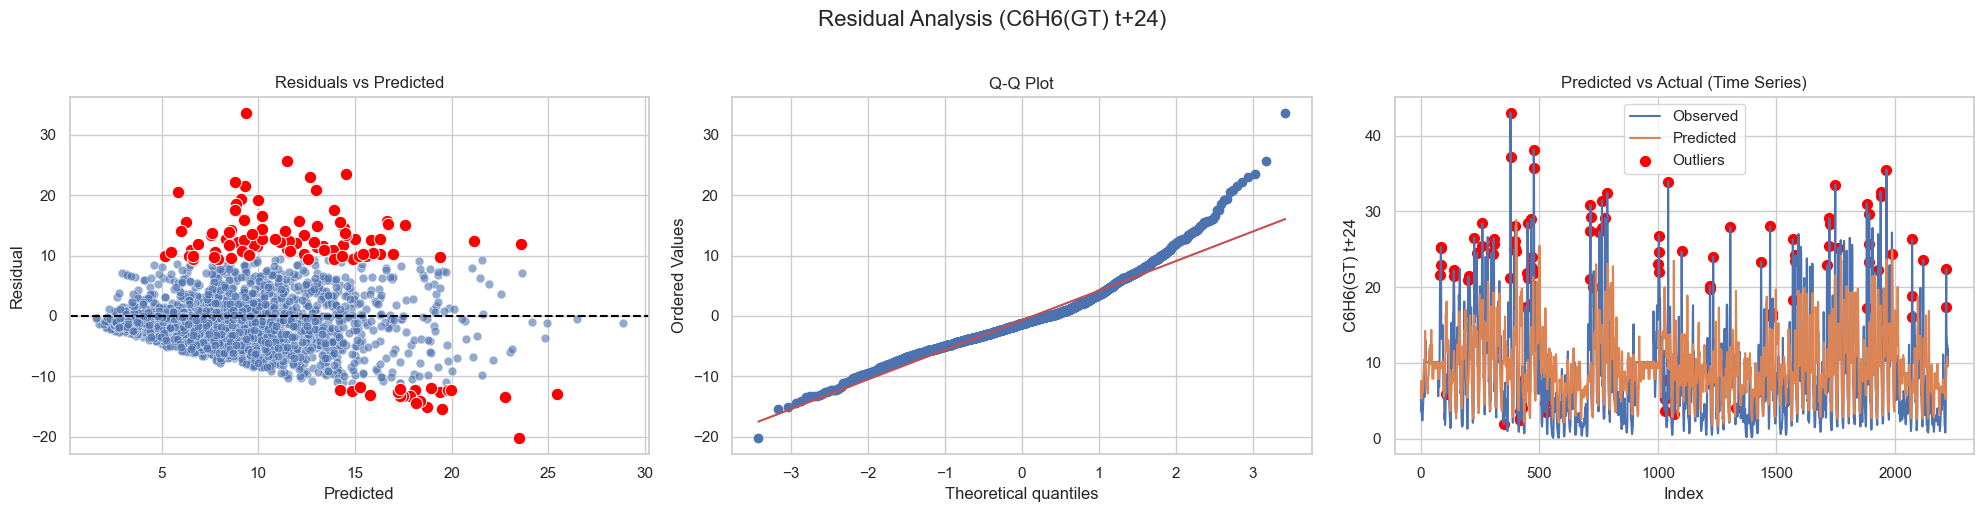


=== LASSO regression for NOx(GT) t+1 ===
Best alpha selected by CV: 2.63665e-01

Selected (non-zero) coefficients:
               feature  coefficient
12        NOx(GT)_lag1   129.200978
2        PT08.S2(NMHC)    88.160492
11       C6H6(GT)_lag1   -71.377172
4         PT08.S4(NO2)   -27.462672
20   month_bin_Oct-Dec    19.878826
16      hour_bin_12-17    19.308950
15       hour_bin_6-11    18.696206
13        NO2(GT)_lag1   -18.677162
19  month_bin_July-Sep    15.635732
0          PT08.S1(CO)    15.077573
5          PT08.S5(O3)    12.359432
7                   RH    11.932601
18   month_bin_Apr-Jun     8.791433
14           is_sunday    -7.197737
3         PT08.S3(NOx)     6.066527
8                   AH    -5.548181
1             NMHC(GT)    -5.275141
17      hour_bin_18-23     4.828119
9          CO(GT)_lag1    -1.562882
10       NMHC(GT)_lag1     1.502256
6                    T    -0.901868
NOx(GT) t+1 RMSE: 128.9885


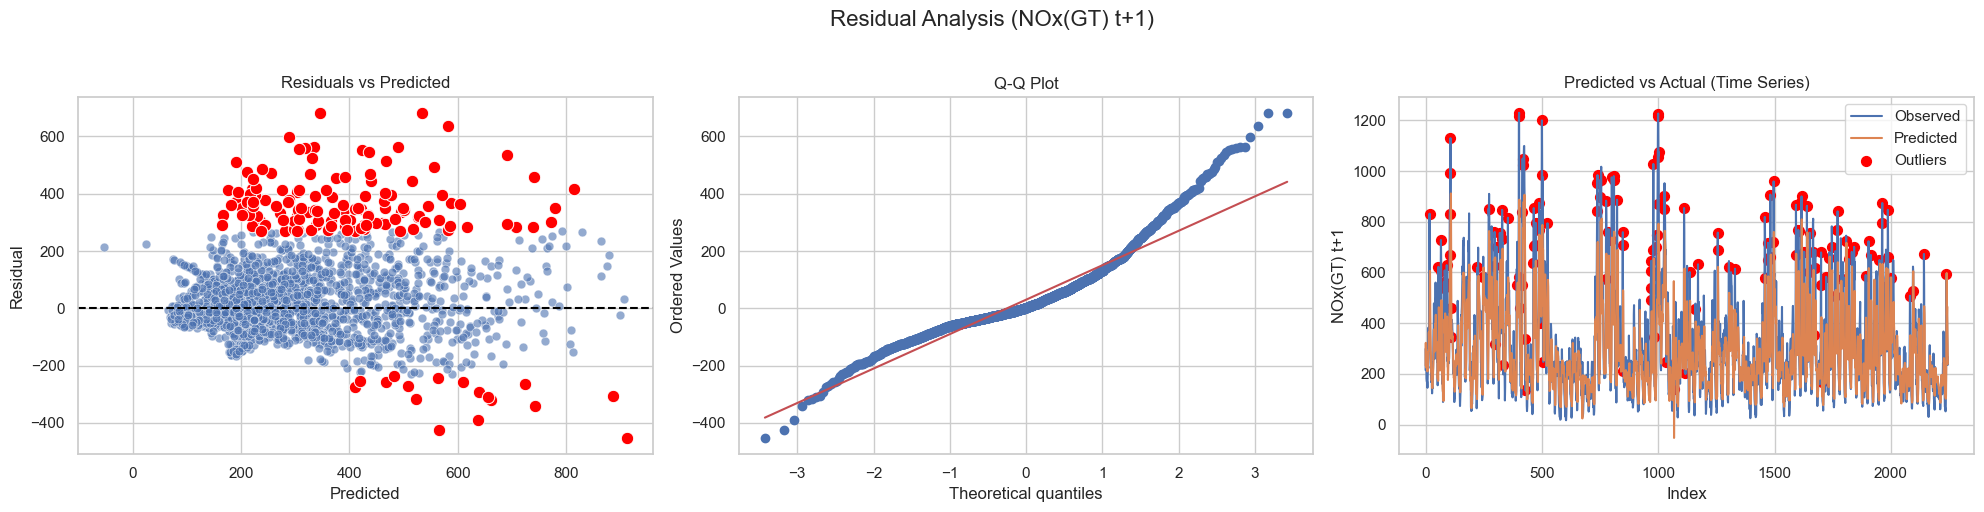


=== LASSO regression for NOx(GT) t+6 ===
Best alpha selected by CV: 2.63665e-01

Selected (non-zero) coefficients:
               feature  coefficient
12        NOx(GT)_lag1    92.019142
5          PT08.S5(O3)    48.394022
9          CO(GT)_lag1   -47.992992
17      hour_bin_18-23   -41.118164
4         PT08.S4(NO2)   -41.034350
20   month_bin_Oct-Dec    32.820843
7                   RH    26.619375
14           is_sunday   -21.628734
6                    T    15.132011
15       hour_bin_6-11   -10.593788
10       NMHC(GT)_lag1    10.461971
8                   AH    -8.954758
11       C6H6(GT)_lag1    -5.646459
16      hour_bin_12-17     4.426506
3         PT08.S3(NOx)    -4.231029
19  month_bin_July-Sep     4.050973
13        NO2(GT)_lag1    -3.711835
2        PT08.S2(NMHC)     3.337527
1             NMHC(GT)    -2.426219
18   month_bin_Apr-Jun     1.171427
NOx(GT) t+6 RMSE: 187.7542


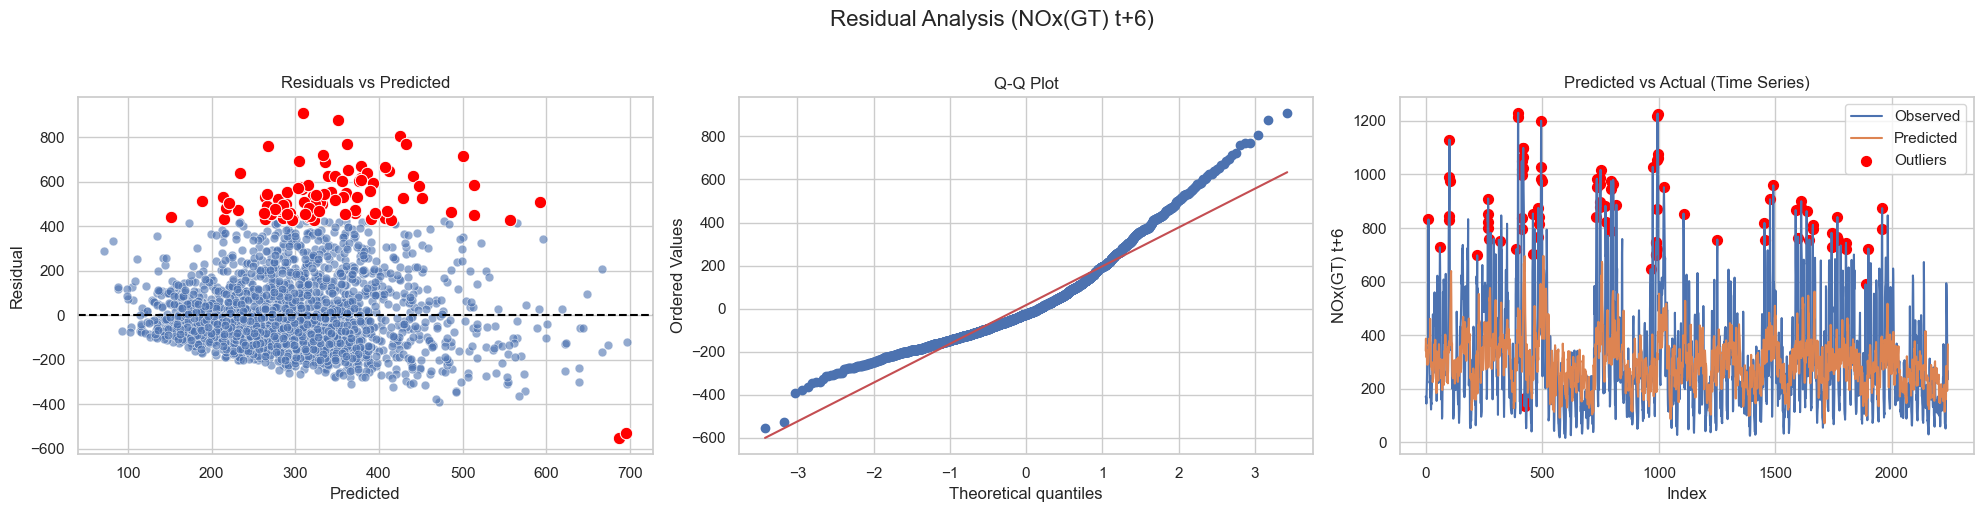


=== LASSO regression for NOx(GT) t+12 ===
Best alpha selected by CV: 1.00000e-04

Selected (non-zero) coefficients:
               feature  coefficient
7                   RH    78.931728
4         PT08.S4(NO2)   -67.733706
6                    T    63.339556
20   month_bin_Oct-Dec    57.071486
5          PT08.S5(O3)    49.810323
8                   AH   -43.938677
2        PT08.S2(NMHC)    39.360438
12        NOx(GT)_lag1    39.146398
16      hour_bin_12-17   -24.927110
19  month_bin_July-Sep    23.856112
3         PT08.S3(NOx)   -23.446588
17      hour_bin_18-23    14.928347
13        NO2(GT)_lag1   -12.973575
14           is_sunday   -12.646200
11       C6H6(GT)_lag1   -12.575346
9          CO(GT)_lag1   -10.784439
18   month_bin_Apr-Jun    10.515701
15       hour_bin_6-11     7.852020
10       NMHC(GT)_lag1     3.271443
1             NMHC(GT)     2.617712
0          PT08.S1(CO)    -1.580374
NOx(GT) t+12 RMSE: 201.6654


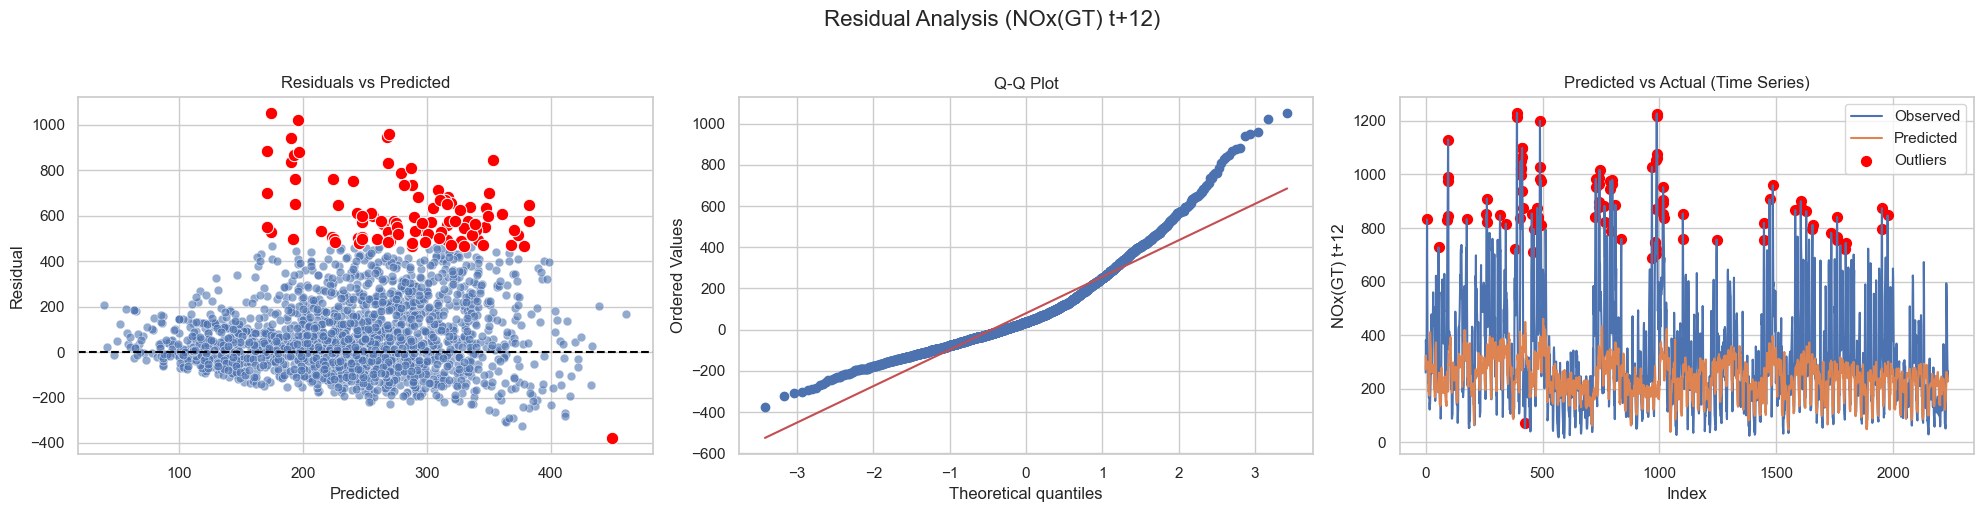


=== LASSO regression for NOx(GT) t+24 ===
Best alpha selected by CV: 1.43845e-01

Selected (non-zero) coefficients:
               feature  coefficient
2        PT08.S2(NMHC)   102.352860
12        NOx(GT)_lag1    80.649139
4         PT08.S4(NO2)   -61.940489
6                    T   -60.768032
8                   AH    44.120784
20   month_bin_Oct-Dec    40.375483
7                   RH   -36.691105
3         PT08.S3(NOx)   -29.728891
16      hour_bin_12-17    23.240506
15       hour_bin_6-11    21.412805
19  month_bin_July-Sep    20.219743
17      hour_bin_18-23    19.609306
5          PT08.S5(O3)    19.088231
9          CO(GT)_lag1   -17.020072
11       C6H6(GT)_lag1   -10.257802
18   month_bin_Apr-Jun    10.254766
14           is_sunday    10.025746
13        NO2(GT)_lag1    -8.205567
1             NMHC(GT)    -5.206232
10       NMHC(GT)_lag1     2.853808
0          PT08.S1(CO)     0.566091
NOx(GT) t+24 RMSE: 188.6608


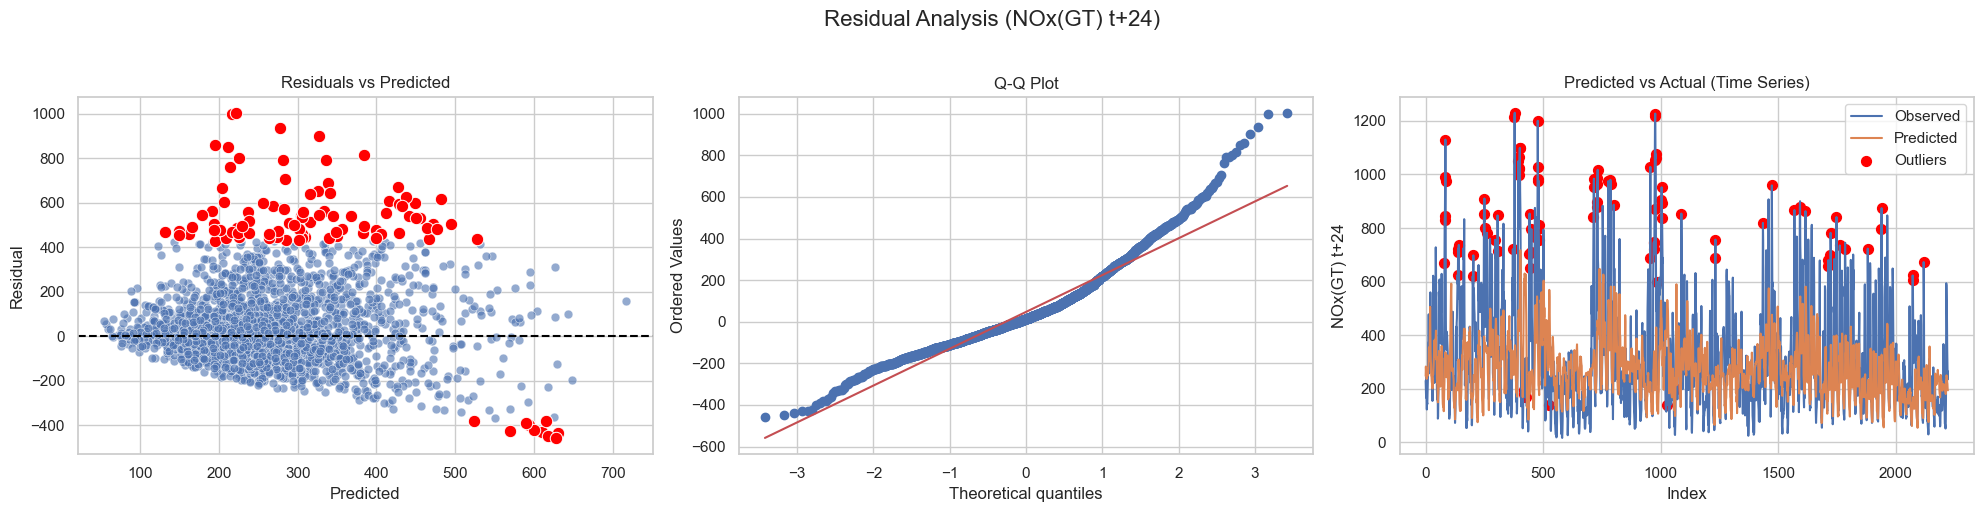


=== LASSO regression for NO2(GT) t+1 ===
Best alpha selected by CV: 1.43845e-01

Selected (non-zero) coefficients:
               feature  coefficient
13        NO2(GT)_lag1    18.732181
2        PT08.S2(NMHC)    13.269436
11       C6H6(GT)_lag1   -12.727745
15       hour_bin_6-11     6.732876
16      hour_bin_12-17     6.083273
5          PT08.S5(O3)     5.444108
8                   AH    -4.700095
20   month_bin_Oct-Dec     3.368403
19  month_bin_July-Sep     3.168714
9          CO(GT)_lag1     2.889891
0          PT08.S1(CO)     2.496905
17      hour_bin_18-23     2.096797
3         PT08.S3(NOx)    -1.877642
14           is_sunday    -1.690210
10       NMHC(GT)_lag1    -0.715579
6                    T     0.633824
18   month_bin_Apr-Jun     0.536909
7                   RH    -0.449663
12        NOx(GT)_lag1     0.341995
1             NMHC(GT)     0.207902
NO2(GT) t+1 RMSE: 36.1727


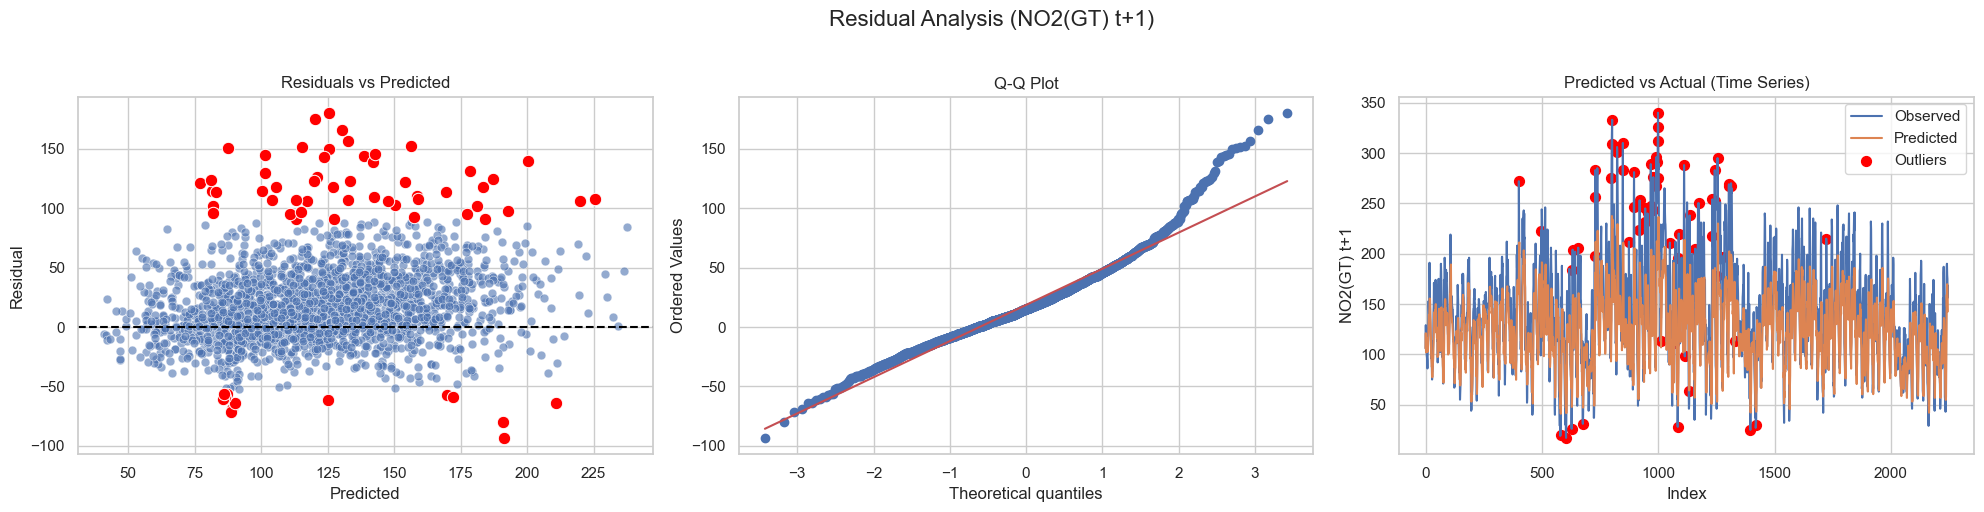


=== LASSO regression for NO2(GT) t+6 ===
Best alpha selected by CV: 2.63665e-01

Selected (non-zero) coefficients:
              feature  coefficient
17     hour_bin_18-23   -12.577255
13       NO2(GT)_lag1     9.174514
12       NOx(GT)_lag1     6.627903
14          is_sunday    -5.972001
8                  AH    -5.508246
5         PT08.S5(O3)     4.862329
9         CO(GT)_lag1    -4.742138
4        PT08.S4(NO2)    -3.082307
11      C6H6(GT)_lag1    -2.657867
16     hour_bin_12-17     2.162582
15      hour_bin_6-11     2.047089
6                   T     1.519993
20  month_bin_Oct-Dec     0.934969
18  month_bin_Apr-Jun    -0.763135
10      NMHC(GT)_lag1     0.708568
NO2(GT) t+6 RMSE: 46.9615


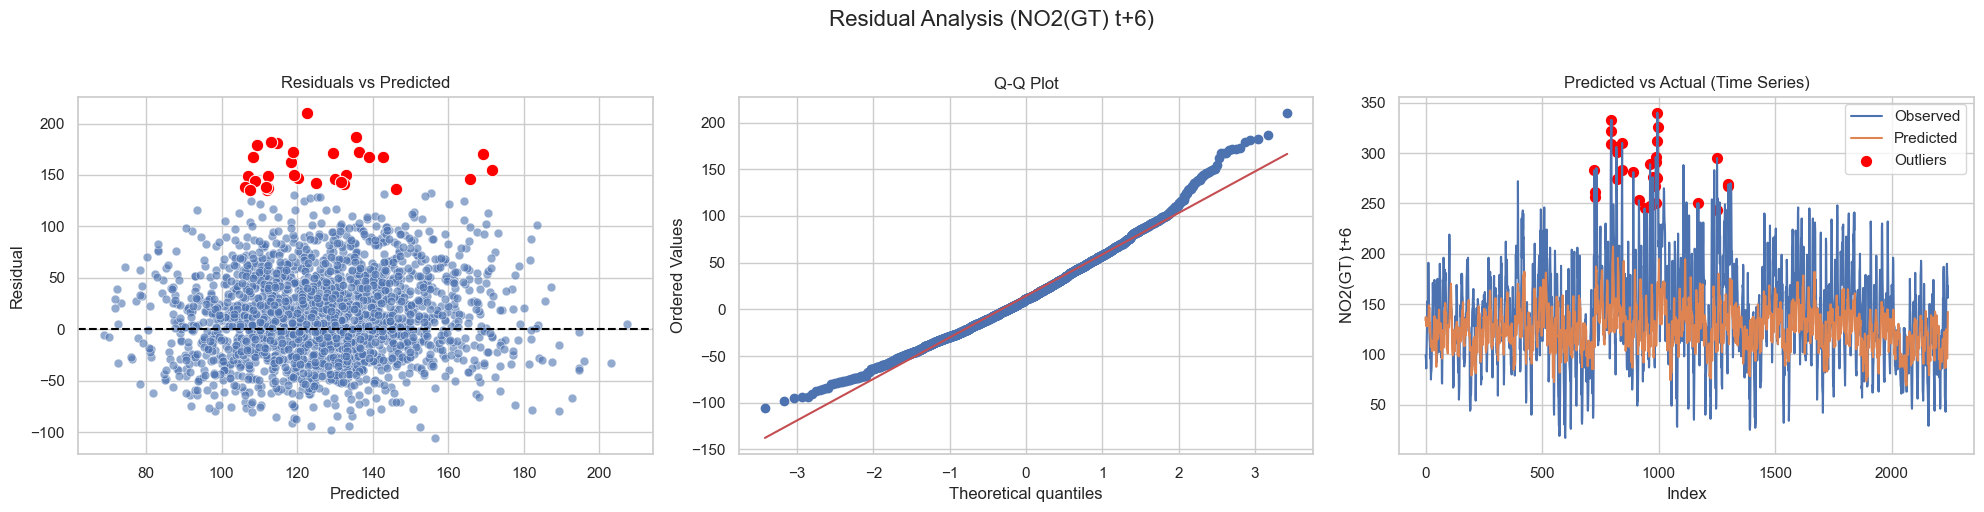


=== LASSO regression for NO2(GT) t+12 ===
Best alpha selected by CV: 2.63665e-01

Selected (non-zero) coefficients:
               feature  coefficient
5          PT08.S5(O3)    13.406643
16      hour_bin_12-17    -9.759563
8                   AH    -6.669363
13        NO2(GT)_lag1     5.841206
0          PT08.S1(CO)    -5.360552
11       C6H6(GT)_lag1    -5.211088
2        PT08.S2(NMHC)    -4.107847
14           is_sunday    -3.930530
20   month_bin_Oct-Dec     3.804706
19  month_bin_July-Sep     3.230005
15       hour_bin_6-11     2.828699
9          CO(GT)_lag1    -2.605223
6                    T    -2.370798
7                   RH     2.165798
17      hour_bin_18-23    -1.606825
1             NMHC(GT)     0.248517
3         PT08.S3(NOx)    -0.083303
10       NMHC(GT)_lag1     0.076059
NO2(GT) t+12 RMSE: 48.3644


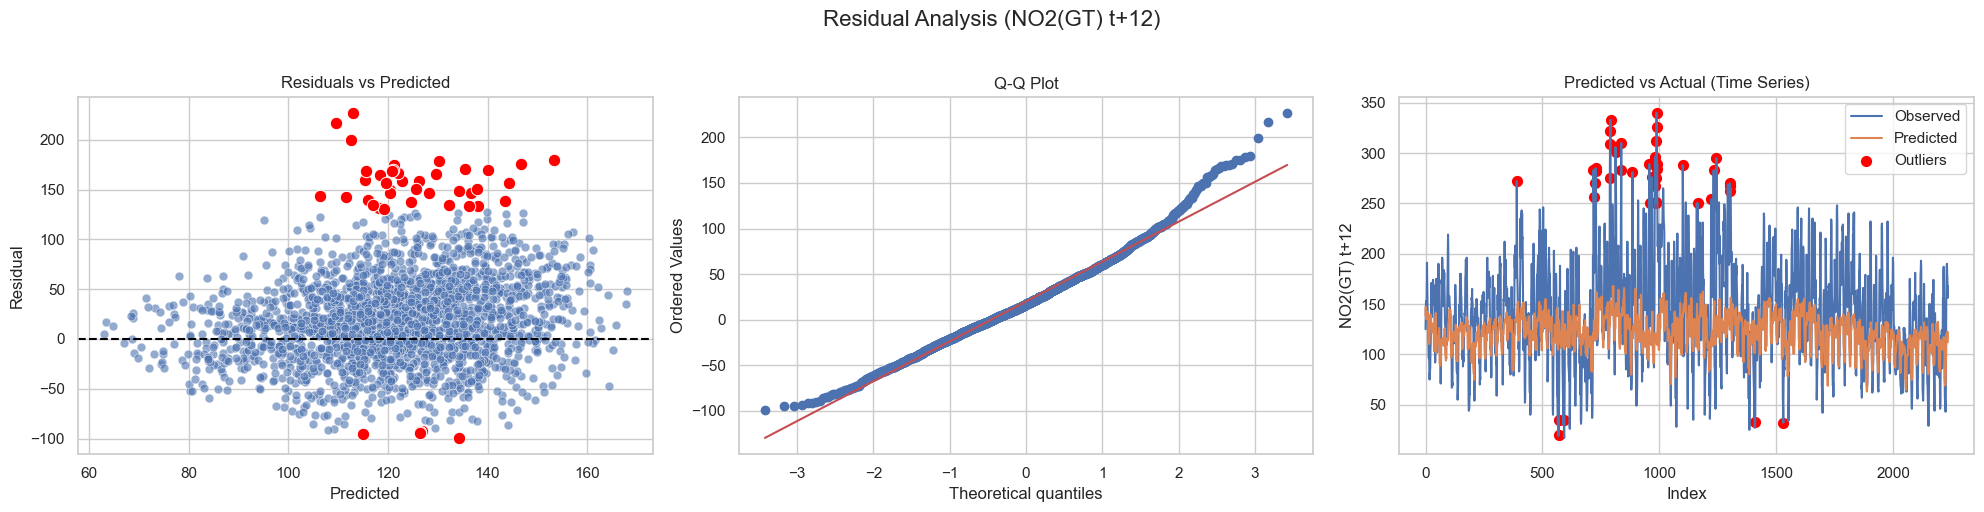


=== LASSO regression for NO2(GT) t+24 ===
Best alpha selected by CV: 2.63665e-01

Selected (non-zero) coefficients:
               feature  coefficient
13        NO2(GT)_lag1    11.458339
2        PT08.S2(NMHC)     6.598852
20   month_bin_Oct-Dec     6.298708
7                   RH    -6.249711
17      hour_bin_18-23     5.817772
16      hour_bin_12-17     4.807918
8                   AH    -4.450882
15       hour_bin_6-11     4.349019
6                    T    -3.716102
19  month_bin_July-Sep     3.110484
3         PT08.S3(NOx)    -3.037632
5          PT08.S5(O3)     2.522158
14           is_sunday     2.235729
9          CO(GT)_lag1     0.397663
10       NMHC(GT)_lag1    -0.069490
NO2(GT) t+24 RMSE: 48.2639


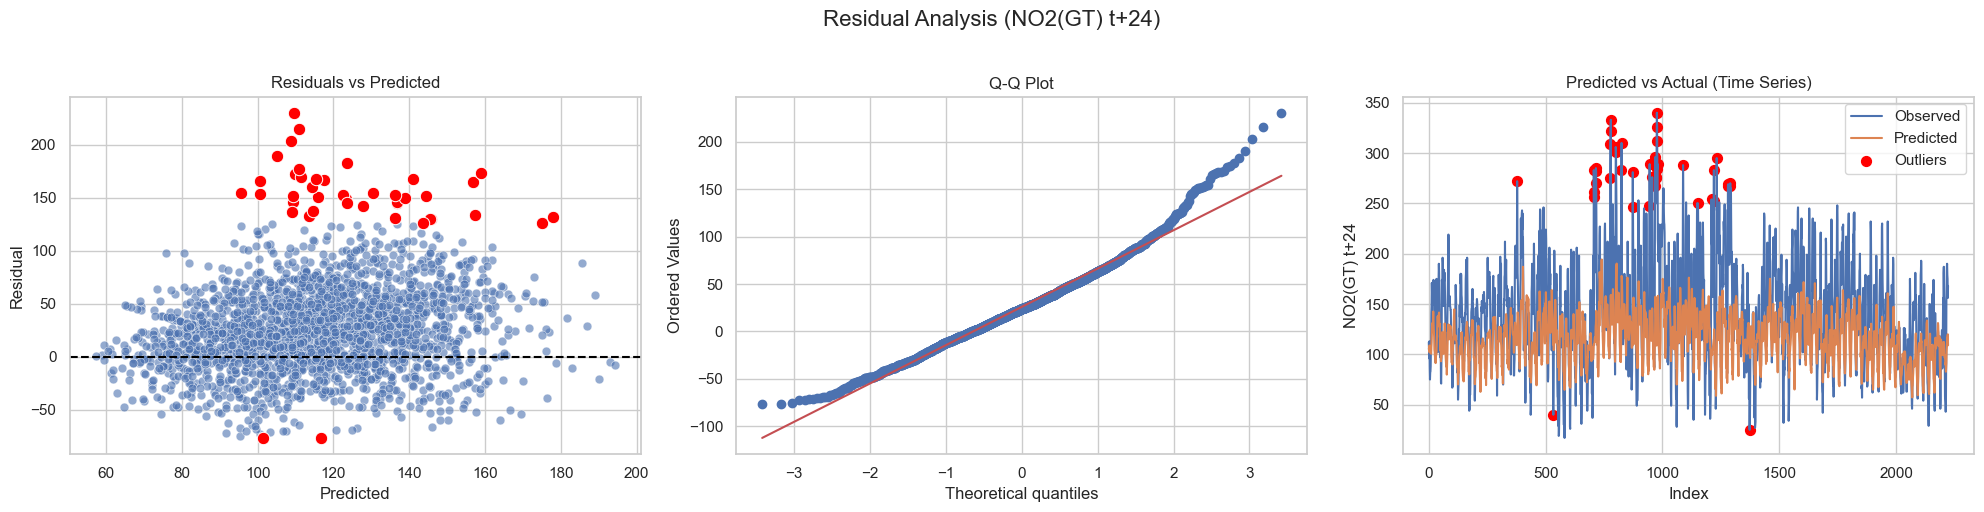


=== LOGISTIC REGRESSION: CO_class t+1 ===


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn


=== Logistic Lasso for CO_class_t1 ===
Best C (inverse of regularization strength): 0.3593813663804626

Non-zero coefficients (feature x classes):
                           0         1         2
PT08.S1(CO)         0.336457 -0.387539  0.121333
NMHC(GT)            0.224635 -0.321868 -0.188525
C6H6(GT)            0.000000 -0.878984 -1.643967
PT08.S2(NMHC)       0.854211  0.000000  0.429429
NOx(GT)             1.337130 -2.417474 -0.622519
PT08.S3(NOx)       -0.354442 -0.042570  0.151637
NO2(GT)             0.652833 -0.617308  1.014713
PT08.S4(NO2)        0.103066 -1.296163  0.508095
PT08.S5(O3)         0.525053  0.274984 -0.150520
T                   0.199452  0.244228 -0.067124
RH                  0.161890  0.127342  0.004268
AH                 -0.184453  0.160433  0.055797
CO(GT)_lag1         1.179191 -1.621544  0.026693
NMHC(GT)_lag1      -0.200398  0.202270  0.043522
C6H6(GT)_lag1      -1.042572  1.601105  0.233716
NOx(GT)_lag1       -0.449237  0.813967 -0.166112
NO2(GT)_lag1       

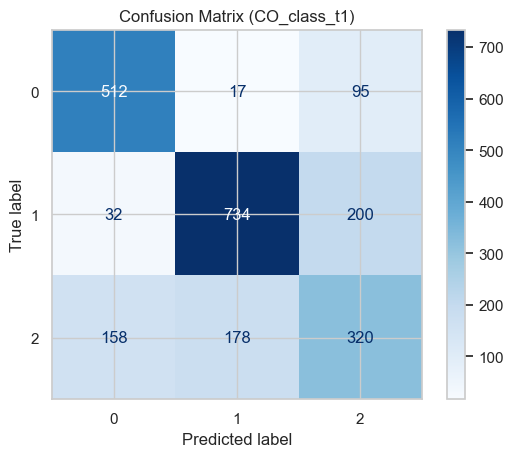

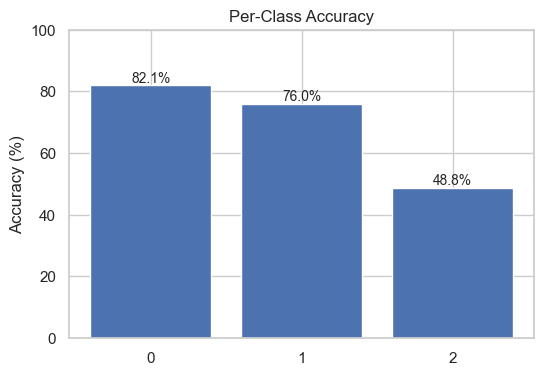

Accuracy (t+1): 0.6972

=== LOGISTIC REGRESSION: CO_class t+6 ===


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn


=== Logistic Lasso for CO_class_t6 ===
Best C (inverse of regularization strength): 0.04641588833612782

Non-zero coefficients (feature x classes):
                           0         1         2
NMHC(GT)            0.000000 -0.027345  0.034996
PT08.S2(NMHC)      -0.350431  0.030505  0.000000
NOx(GT)             0.398478 -0.540668 -0.053446
PT08.S3(NOx)        0.000000  0.000000  0.005686
NO2(GT)            -0.227083 -0.032243  0.262398
PT08.S4(NO2)        0.000000 -0.135146  0.278175
PT08.S5(O3)         0.543566  0.000000 -0.356216
T                   0.000000 -0.109027  0.000000
RH                  0.053945 -0.153159  0.000000
AH                 -0.067728  0.000000  0.031379
CO(GT)_lag1         0.000000  0.093097  0.000000
C6H6(GT)_lag1       0.000000  0.231604 -0.138533
NOx(GT)_lag1        0.069019  0.000000  0.000000
NO2(GT)_lag1        0.000000 -0.288264  0.116116
is_sunday          -0.475329  0.394594 -0.088286
hour_bin_6-11      -0.125387 -0.081641  0.155908
hour_bin_12-17    

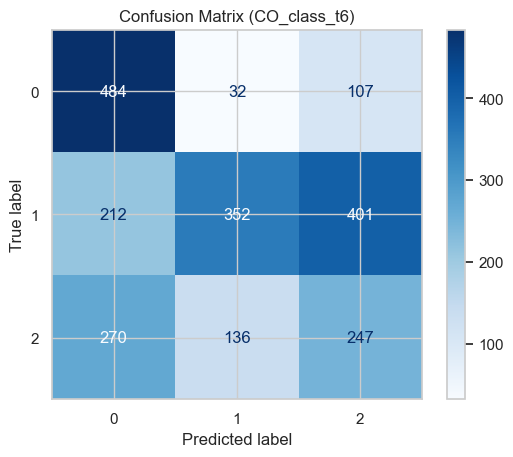

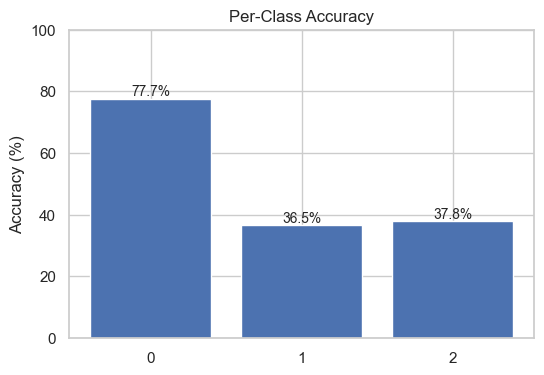

Accuracy (t+6): 0.4833

=== LOGISTIC REGRESSION: CO_class t+12 ===


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn


=== Logistic Lasso for CO_class_t12 ===
Best C (inverse of regularization strength): 0.3593813663804626

Non-zero coefficients (feature x classes):
                           0         1         2
PT08.S1(CO)        -0.395828  0.067588  0.046757
NMHC(GT)           -0.025143  0.028964 -0.001948
C6H6(GT)            0.037032  0.745851 -0.868104
NOx(GT)             0.163834  0.000000 -0.099082
PT08.S3(NOx)       -0.269098 -0.041304  0.246786
NO2(GT)            -0.399483  0.006774  0.257600
PT08.S4(NO2)        0.025518 -0.340931  0.528409
PT08.S5(O3)         1.283009 -0.542172 -0.294485
T                  -0.013272 -0.249605 -0.321061
RH                  0.498649 -0.442490 -0.306531
AH                 -0.290079  0.332518  0.164164
CO(GT)_lag1         0.328265 -0.159331 -0.144877
NMHC(GT)_lag1       0.000000  0.017102 -0.019626
C6H6(GT)_lag1      -0.365869  0.178798  0.190780
NOx(GT)_lag1       -0.216158  0.165375  0.000000
NO2(GT)_lag1       -0.085236 -0.246630  0.298974
is_sunday         

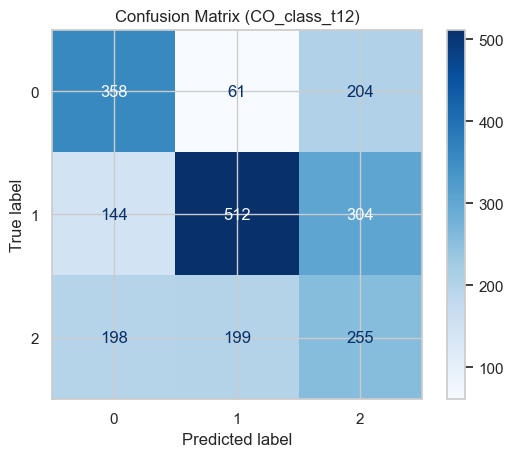

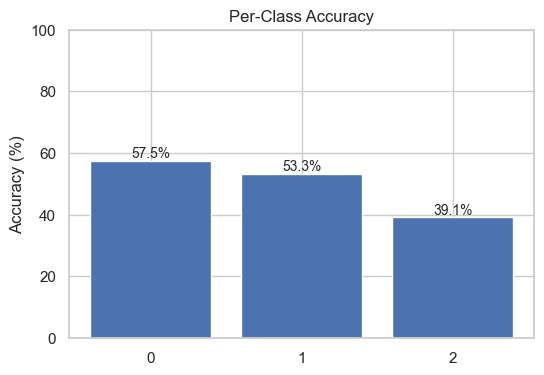

Accuracy (t+12): 0.5034

=== LOGISTIC REGRESSION: CO_class t+24 ===


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn


=== Logistic Lasso for CO_class_t24 ===
Best C (inverse of regularization strength): 0.3593813663804626

Non-zero coefficients (feature x classes):
                           0         1         2
PT08.S1(CO)         0.144536 -0.191887  0.187568
NMHC(GT)           -0.020313 -0.160444 -0.006327
C6H6(GT)            0.000000 -0.716300 -0.457125
PT08.S2(NMHC)       0.927099 -0.056646  0.000000
NOx(GT)             0.274589 -0.083808 -0.341287
PT08.S3(NOx)       -0.540516  0.301017  0.102234
NO2(GT)             0.099037  0.000000  0.081008
PT08.S4(NO2)        0.000000 -0.322453  0.338993
PT08.S5(O3)         0.177175  0.449561 -0.332098
T                  -0.645293  0.537065  0.065749
RH                 -0.540954  0.251306  0.179183
AH                  0.270380 -0.201178 -0.083157
CO(GT)_lag1         0.331930 -0.282699 -0.083995
NMHC(GT)_lag1      -0.006631 -0.010231  0.000000
C6H6(GT)_lag1       0.032557  0.028791 -0.037406
NOx(GT)_lag1        0.000000 -0.010231 -0.119745
NO2(GT)_lag1      

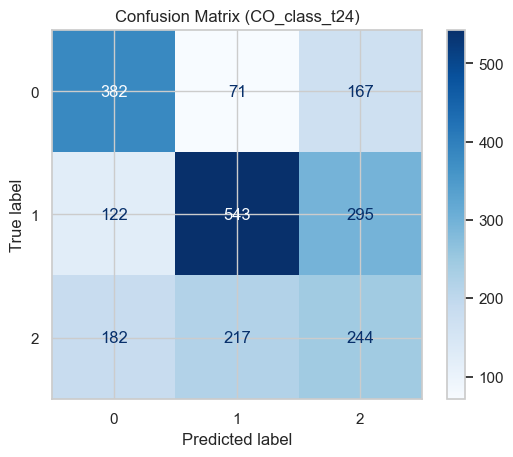

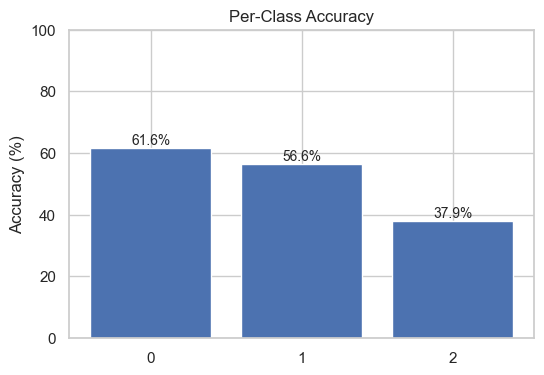

Accuracy (t+24): 0.5259


In [28]:
# For demonstration assume `df` is already prepared and contains necessary columns
# targets for regression:
df, df_unnormalised, num_cols, df_unclean = eda_dpp_utils.preProcessing()
df = model_utils.featurePrep(df_unnormalised)
# targets for regression:
targets = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
df = model_utils.add_future_regression_targets(df, targets)

# Split features/targets (we'll select target column dynamically later)
feature_names, X_train_vals, y_train_df, X_test_vals, y_test_df = model_utils.splitSets(df, targets)

X_train_df = pd.DataFrame(X_train_vals, columns=feature_names)
X_test_df  = pd.DataFrame(X_test_vals, columns=feature_names)

alphas = np.logspace(-4, 1, 20)

# Regression: separate Lasso model per target and horizon
for t in targets:
    for k in [1, 6, 12, 24]:
        target_col = f"{t}_t{k}"

        # Make sure the target column exists
        if target_col not in y_train_df.columns:
            continue

        # Drop NaNs in target
        y_train = y_train_df[target_col].dropna().reset_index(drop=True)
        X_train = X_train_df.loc[y_train.index].reset_index(drop=True)

        y_test = y_test_df[target_col].dropna().reset_index(drop=True)
        X_test = X_test_df.loc[y_test.index].reset_index(drop=True)

        if y_train.empty or y_test.empty:
            continue

        print(f"\n=== LASSO regression for {t} t+{k} ===")
        lasso_model, selected_features, coef_df, best_alpha = model_utils.lassoRegression(
            X_train, y_train, alphas
        )
        if len(selected_features) > 0:
            model_utils.plotResiduals(
                lasso_model, X_test, y_test,
                selected_features=feature_names, target_name=f"{t} t+{k}"
            )

# === Classification ===
# df, df_unnormalised, num_cols, df_unclean = eda_dpp_utils.preProcessing()
# df = model_utils.featurePrep(df_unnormalised)
df, df_unnormalised, num_cols, df_unclean = eda_dpp_utils.preProcessing()
df = model_utils.featurePrep(df_unnormalised)
df = model_utils.add_future_classes(df)
df = model_utils.discretize_CO(df)  # ensure CO_class exists (if you want it separately)

results = {}
for k in [1, 6, 12, 24]:
    target_col = f"CO_class_t{k}"
    print(f"\n=== LOGISTIC REGRESSION: CO_class t+{k} ===")
    
    X_train, X_test, y_train, y_test, feature_names_clf, le = model_utils.classificationSplit(df, target_col=target_col)

    # Drop any remaining NaNs and reset index
    y_train = pd.Series(y_train).reset_index(drop=True)
    X_train = X_train.reset_index(drop=True).loc[y_train.index]

    y_test = pd.Series(y_test).reset_index(drop=True)
    X_test = X_test.reset_index(drop=True).loc[y_test.index]

    best_model, coef_df, y_pred = model_utils.logisticLasso(X_train, y_train, X_test, y_test, target_name=target_col)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy (t+{k}): {acc:.4f}")

